# BIOCHEM

### Data was collected and cleaned as described in NHANES_all.ipyn. This part will focus on analysing the data for identifying parameters that could be used to predict breast cancer.  


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('nhanes_breast_cancer_all_nhanes_biochemistry.csv')

In [3]:
df['Breast cancer'].value_counts()

1    566
0    566
Name: Breast cancer, dtype: int64

In [4]:
df.head()

,Id,Age,Bio_alanine aminotransferase alt (iu/l),Bio_albumin (g/l),Bio_aspartate aminotransferase ast (iu/l),Bio_bicarbonate (mmol/l),Bio_blood urea nitrogen (mg/dl),Bio_blood urea nitrogen (mmol/l),Bio_chloride (mmol/l),Bio_cholesterol (mmol/l),...,Bio_osmolality (mmol/kg),Bio_phosphorus (mmol/l),Bio_potassium (mmol/l),Bio_sodium (mmol/l),Bio_total bilirubin (umol/l),Bio_total calcium (mmol/l),Bio_total protein (g/l),"Bio_triglycerides, refrigerated (mmol/l)",Bio_uric acid (umol/l),Breast cancer
0,94.0,61.0,21.0,40.0,21.0,25.0,15.0,5.4,101.7,6.08,...,277.0,1.227,4.13,138.3,5.1,2.275,71.0,2.269,285.5,1
1,206.0,50.0,23.0,45.0,25.0,27.0,16.0,5.7,101.8,6.28,...,281.0,1.130,4.16,140.9,8.6,2.325,74.0,1.106,267.7,1
2,237.0,81.0,13.0,45.0,19.0,23.0,17.0,6.1,104.0,6.78,...,287.0,1.130,4.64,143.5,12.0,2.400,77.0,1.039,243.9,1
3,281.0,15.0,9.0,47.0,16.0,25.0,7.0,2.5,102.4,3.26,...,279.0,1.195,4.62,141.4,13.7,2.375,70.0,0.474,190.3,0
4,389.0,81.0,27.0,42.0,32.0,30.0,18.0,6.4,104.0,4.60,...,289.0,1.162,3.97,144.6,23.9,2.450,68.0,1.219,279.6,1


In [5]:
df.isna().sum()

Id                                           0
Age                                          0
Bio_alanine aminotransferase alt (iu/l)      0
Bio_albumin (g/l)                            0
Bio_aspartate aminotransferase ast (iu/l)    0
Bio_bicarbonate (mmol/l)                     0
Bio_blood urea nitrogen (mg/dl)              0
Bio_blood urea nitrogen (mmol/l)             0
Bio_chloride (mmol/l)                        0
Bio_cholesterol (mmol/l)                     0
Bio_creatinine (umol/l)                      0
Bio_gamma glutamyl transferase (u/l)         0
Bio_globulin (g/l)                           0
Bio_glucose, refrigerated serum (mmol/l)     0
Bio_iron, refrigerated serum (umol/l)        0
Bio_osmolality (mmol/kg)                     0
Bio_phosphorus (mmol/l)                      0
Bio_potassium (mmol/l)                       0
Bio_sodium (mmol/l)                          0
Bio_total bilirubin (umol/l)                 0
Bio_total calcium (mmol/l)                   0
Bio_total pro

In [6]:
df.describe()

,Id,Age,Bio_alanine aminotransferase alt (iu/l),Bio_albumin (g/l),Bio_aspartate aminotransferase ast (iu/l),Bio_bicarbonate (mmol/l),Bio_blood urea nitrogen (mg/dl),Bio_blood urea nitrogen (mmol/l),Bio_chloride (mmol/l),Bio_cholesterol (mmol/l),...,Bio_osmolality (mmol/kg),Bio_phosphorus (mmol/l),Bio_potassium (mmol/l),Bio_sodium (mmol/l),Bio_total bilirubin (umol/l),Bio_total calcium (mmol/l),Bio_total protein (g/l),"Bio_triglycerides, refrigerated (mmol/l)",Bio_uric acid (umol/l),Breast cancer
count,1132.000000,1132.000000,1132.000000,1132.000000,1132.000000,1132.000000,1132.000000,1132.000000,1132.000000,1132.000000,...,1132.000000,1132.000000,1132.000000,1132.000000,1.132000e+03,1132.000000,1132.000000,1132.000000,1132.000000,1132.000000
mean,49164.257067,54.113958,20.920495,41.793286,23.742933,24.862191,13.759717,4.912668,103.470053,5.080999,...,278.294170,1.252360,3.982986,139.152297,1.054261e+01,2.367049,71.280035,1.571526,298.330477,0.500000
std,26360.860894,21.992328,11.074654,3.237658,8.395938,2.368841,6.385954,2.279789,3.008587,1.113162,...,5.657561,0.172595,0.344969,2.513529,4.153504e+00,0.099716,4.896292,1.056328,81.672916,0.500221
min,94.000000,12.000000,6.000000,28.000000,9.000000,16.000000,3.000000,1.070000,91.000000,1.914000,...,241.000000,0.710000,2.500000,121.000000,5.397605e-79,1.975000,54.000000,0.203000,83.300000,0.000000
25%,27322.750000,36.000000,15.000000,40.000000,19.000000,23.000000,10.000000,3.570000,102.000000,4.319000,...,275.000000,1.130000,3.800000,138.000000,8.550000e+00,2.300000,68.000000,0.903000,243.900000,0.000000
50%,49344.500000,60.000000,18.000000,42.000000,22.000000,25.000000,13.000000,4.640000,104.000000,4.939000,...,278.000000,1.259000,4.000000,139.000000,1.026000e+01,2.350000,71.000000,1.321000,285.500000,0.500000
75%,71713.250000,72.000000,23.000000,44.000000,26.000000,26.000000,16.000000,5.710000,105.000000,5.747500,...,282.000000,1.356000,4.200000,141.000000,1.197000e+01,2.425000,74.000000,1.908000,340.500000,1.000000
max,93695.000000,85.000000,120.000000,52.000000,105.000000,35.000000,69.000000,24.630000,113.000000,11.585000,...,301.000000,1.970000,5.860000,147.000000,4.275000e+01,3.025000,96.000000,11.200000,826.800000,1.000000


# Split set train test

In [7]:
seed=666
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

id_col = ['Id']
target_col = ['Breast cancer']
# i will ignore the age column for now
num_col = [i for i in df.columns if i.startswith('Bio')]

train, test = train_test_split(df, test_size=.2, random_state=seed)

train_X = train[num_col].reset_index(drop=True)
train_Y = train[target_col].reset_index(drop=True)

test_X = test[num_col].reset_index(drop=True)
test_Y = test[target_col].reset_index(drop=True)


In [8]:
test['Breast cancer'].value_counts()

0    117
1    110
Name: Breast cancer, dtype: int64

In [9]:
train['Breast cancer'].value_counts()

1    456
0    449
Name: Breast cancer, dtype: int64

# Feature scaling - prior to feature selection
right or wrong?

In [10]:
# Feature scaling - standardize
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler

std = scaler()
scaled_fitted = std.fit(train_X[num_col])
scaled_train = scaled_fitted.transform(train_X[num_col])
scaled_train = pd.DataFrame(scaled_train, columns=num_col)

In [11]:
scaled_train.describe()

,Bio_alanine aminotransferase alt (iu/l),Bio_albumin (g/l),Bio_aspartate aminotransferase ast (iu/l),Bio_bicarbonate (mmol/l),Bio_blood urea nitrogen (mg/dl),Bio_blood urea nitrogen (mmol/l),Bio_chloride (mmol/l),Bio_cholesterol (mmol/l),Bio_creatinine (umol/l),Bio_gamma glutamyl transferase (u/l),...,"Bio_iron, refrigerated serum (umol/l)",Bio_osmolality (mmol/kg),Bio_phosphorus (mmol/l),Bio_potassium (mmol/l),Bio_sodium (mmol/l),Bio_total bilirubin (umol/l),Bio_total calcium (mmol/l),Bio_total protein (g/l),"Bio_triglycerides, refrigerated (mmol/l)",Bio_uric acid (umol/l)
count,9.050000e+02,9.050000e+02,9.050000e+02,9.050000e+02,9.050000e+02,9.050000e+02,9.050000e+02,9.050000e+02,9.050000e+02,9.050000e+02,...,9.050000e+02,9.050000e+02,9.050000e+02,9.050000e+02,9.050000e+02,9.050000e+02,9.050000e+02,9.050000e+02,9.050000e+02,9.050000e+02
mean,1.413234e-16,1.177695e-16,1.648773e-16,-6.124015e-16,-1.962825e-17,1.138439e-16,2.371584e-15,-4.161190e-16,-2.885353e-16,-3.140520e-17,...,3.925650e-17,-1.421085e-15,1.481933e-16,-4.867807e-16,-5.819777e-15,-4.082676e-16,-5.366364e-15,-3.650855e-16,-8.047583e-17,-3.434944e-16
std,1.000553e+00,1.000553e+00,1.000553e+00,1.000553e+00,1.000553e+00,1.000553e+00,1.000553e+00,1.000553e+00,1.000553e+00,1.000553e+00,...,1.000553e+00,1.000553e+00,1.000553e+00,1.000553e+00,1.000553e+00,1.000553e+00,1.000553e+00,1.000553e+00,1.000553e+00,1.000553e+00
min,-1.456844e+00,-4.356898e+00,-1.752721e+00,-3.736584e+00,-1.651357e+00,-1.651979e+00,-4.048365e+00,-2.267708e+00,-1.268721e+00,-6.317812e-01,...,-2.218727e+00,-6.472961e+00,-3.089728e+00,-4.236157e+00,-7.043784e+00,-2.561691e+00,-3.940265e+00,-3.535244e+00,-1.271308e+00,-2.602204e+00
25%,-5.640597e-01,-5.579488e-01,-5.630320e-01,-7.736024e-01,-5.791680e-01,-5.793577e-01,-4.580653e-01,-6.993441e-01,-4.178890e-01,-3.979557e-01,...,-7.025961e-01,-7.282586e-01,-6.820934e-01,-5.228876e-01,-4.178414e-01,-4.998103e-01,-6.639050e-01,-6.582742e-01,-6.328517e-01,-6.613368e-01
50%,-2.664650e-01,7.520941e-02,-2.061252e-01,7.296371e-02,-1.196586e-01,-1.202758e-01,1.947165e-01,-1.233562e-01,-1.429525e-01,-2.518147e-01,...,-7.523173e-02,-3.193104e-02,5.739430e-02,4.838454e-02,-2.808004e-02,-8.743423e-02,-1.598496e-01,-4.178077e-02,-2.353221e-01,-1.585966e-01
75%,2.295260e-01,7.083677e-01,2.697506e-01,4.962468e-01,3.398508e-01,3.388061e-01,5.211074e-01,6.140154e-01,2.321152e-01,4.046733e-02,...,5.521326e-01,6.643965e-01,6.134432e-01,6.196567e-01,7.514426e-01,3.249419e-01,5.962335e-01,5.747127e-01,2.873042e-01,4.879563e-01
max,6.975004e+00,3.241001e+00,9.668297e+00,3.035945e+00,8.457850e+00,8.456404e+00,3.132234e+00,5.825547e+00,2.273731e+01,1.532682e+01,...,5.292219e+00,3.971952e+00,4.133175e+00,5.361215e+00,3.090010e+00,7.747711e+00,6.644898e+00,5.095665e+00,8.918978e+00,6.383069e+00


# Feature Selection with non scaled set
###### https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e
### 1. Univariate Selection
- Select features according to the k highest scores using hi-squared (chi²) statistical test for non-negative features to select 10 of the best feature


In [12]:
# import modules
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [13]:
X = train[num_col].reset_index(drop=True) # indepoendent columns
y = train[target_col].reset_index(drop=True) # target column


In [14]:
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features


                                        Specs        Score
21                     Bio_uric acid (umol/l)  1471.388585
8                     Bio_creatinine (umol/l)   592.699734
9        Bio_gamma glutamyl transferase (u/l)   326.406591
4             Bio_blood urea nitrogen (mg/dl)   260.239729
5            Bio_blood urea nitrogen (mmol/l)    92.946708
2   Bio_aspartate aminotransferase ast (iu/l)    35.070610
11   Bio_glucose, refrigerated serum (mmol/l)    23.927229
19                    Bio_total protein (g/l)    14.464807
0     Bio_alanine aminotransferase alt (iu/l)    13.796235
3                    Bio_bicarbonate (mmol/l)    13.522939


## 2. Feature Importance
- Extra Tree Classifier

In [15]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

[0.03613897 0.04803293 0.0394796  0.06342178 0.05893658 0.05868295
 0.04299633 0.04583257 0.04447153 0.04411167 0.04059274 0.04508171
 0.03869568 0.05688051 0.03660713 0.03540927 0.03693146 0.03537389
 0.04589048 0.05013346 0.04061037 0.05568841]


/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/Cellar/ipython/7.8.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


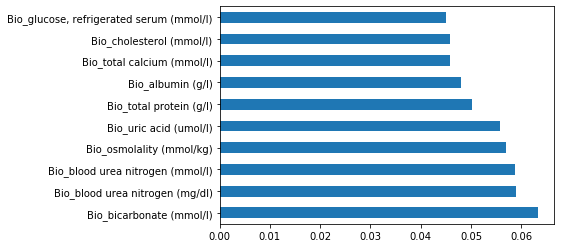

In [16]:
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

## 3. Correlation Matrix with Heatmap

(22.0, 0.0)

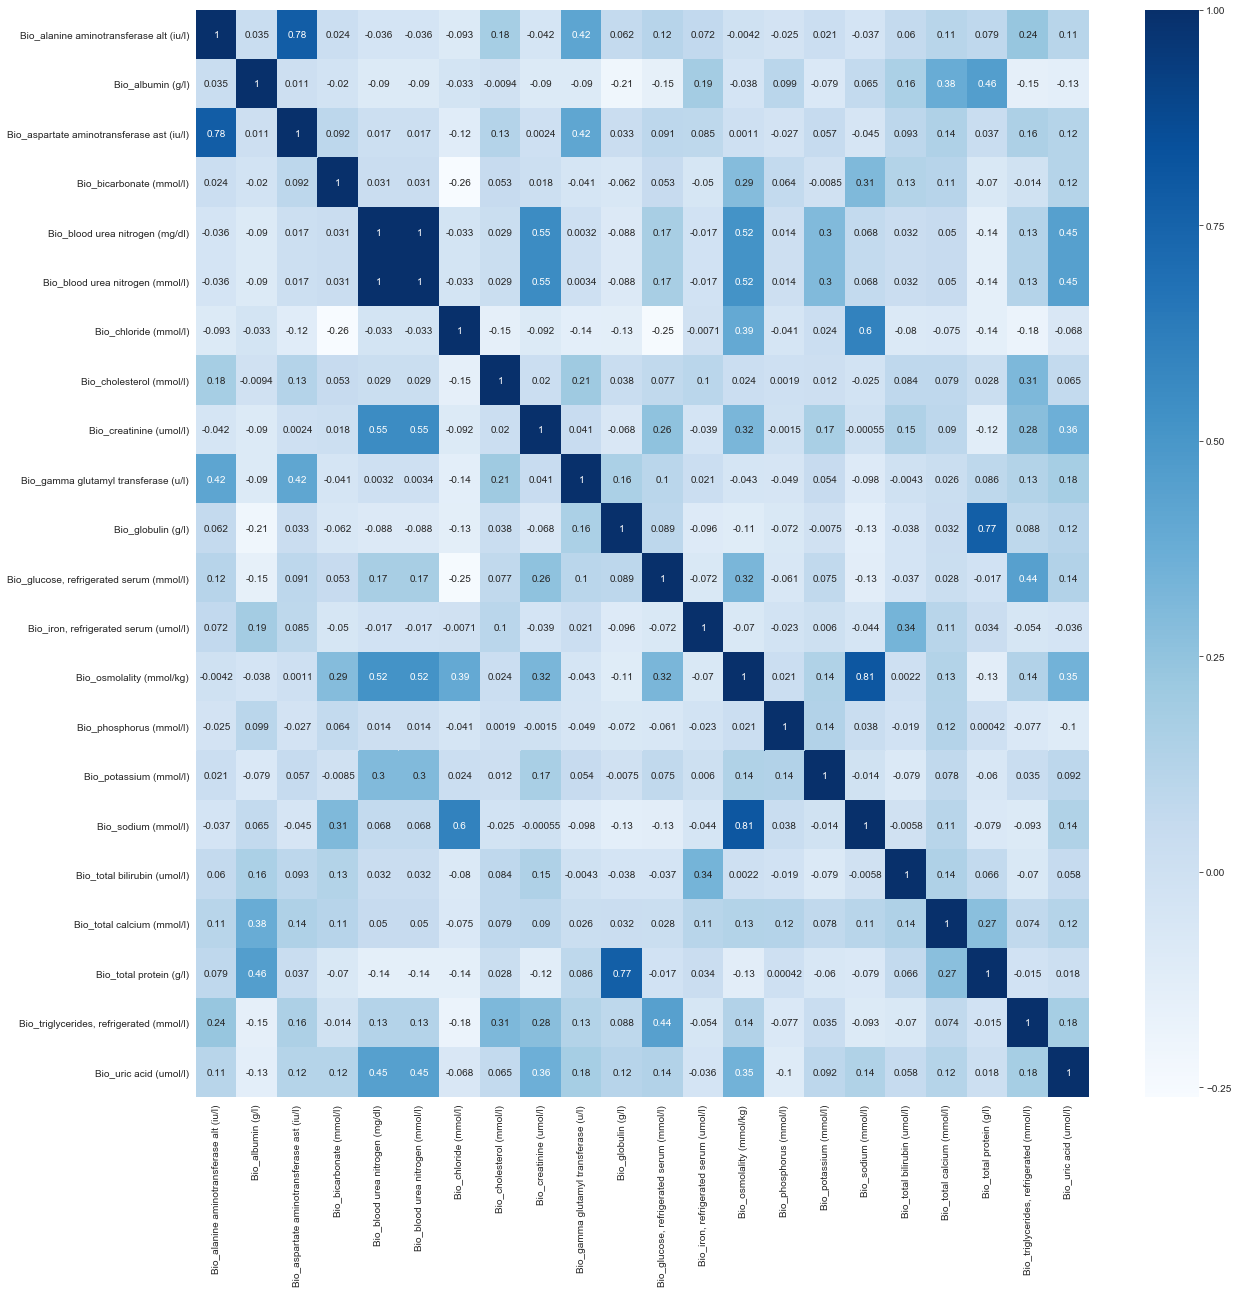

In [17]:
sns.set_style('darkgrid', {'legend.frameon':True})

#get correlations of each features in dataset
corrmat = train_X.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
ax=sns.heatmap(train_X[top_corr_features].corr(),annot=True,cmap="Blues")
#making sure the heatmap will not be cut
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)


In [18]:
train.columns

Index(['Id', 'Age', 'Bio_alanine aminotransferase alt (iu/l)',
       'Bio_albumin (g/l)', 'Bio_aspartate aminotransferase ast (iu/l)',
       'Bio_bicarbonate (mmol/l)', 'Bio_blood urea nitrogen (mg/dl)',
       'Bio_blood urea nitrogen (mmol/l)', 'Bio_chloride (mmol/l)',
       'Bio_cholesterol (mmol/l)', 'Bio_creatinine (umol/l)',
       'Bio_gamma glutamyl transferase (u/l)', 'Bio_globulin (g/l)',
       'Bio_glucose, refrigerated serum (mmol/l)',
       'Bio_iron, refrigerated serum (umol/l)', 'Bio_osmolality (mmol/kg)',
       'Bio_phosphorus (mmol/l)', 'Bio_potassium (mmol/l)',
       'Bio_sodium (mmol/l)', 'Bio_total bilirubin (umol/l)',
       'Bio_total calcium (mmol/l)', 'Bio_total protein (g/l)',
       'Bio_triglycerides, refrigerated (mmol/l)', 'Bio_uric acid (umol/l)',
       'Breast cancer'],
      dtype='object')

# 3. Heatmap - remove the parameters that seem to be multicorrelated
- 'Bio_gamma glutamyl transferase (u/l)','Bio_alanine aminotransferase alt (iu/l)', 'Bio_aspartate aminotransferase ast (iu/l)',
- 'Bio_osmolality (mmol/kg)', 'Bio_creatinine (umol/l)' ,'Bio_blood urea nitrogen (mg/dl)', 'Bio_blood urea nitrogen (mmol/l)', 'Bio_sodium (mmol/l)','Bio_chloride (mmol/l)'
- 'Bio_total protein (g/l)', 'Bio_globulin (g/l)', 'Bio_albumin (g/l)'

In [21]:
# removing the columns that could be multicorrelated
train_X = train_X.drop(columns = ['Bio_alanine aminotransferase alt (iu/l)',
                                  'Bio_aspartate aminotransferase ast (iu/l)', 
                                  'Bio_creatinine (umol/l)',
                                  'Bio_blood urea nitrogen (mg/dl)', 
                                  'Bio_blood urea nitrogen (mmol/l)', 
                                  'Bio_sodium (mmol/l)',
                                  'Bio_chloride (mmol/l)',
                                  'Bio_globulin (g/l)', 
                                  'Bio_albumin (g/l)'
                       ])


In [20]:
train = train.drop(columns = ['Bio_alanine aminotransferase alt (iu/l)',
                                  'Bio_aspartate aminotransferase ast (iu/l)', 
                                  'Bio_creatinine (umol/l)',
                                  'Bio_blood urea nitrogen (mg/dl)', 
                                  'Bio_blood urea nitrogen (mmol/l)', 
                                  'Bio_sodium (mmol/l)',
                                  'Bio_chloride (mmol/l)',
                                  'Bio_globulin (g/l)', 
                                  'Bio_albumin (g/l)',
                                  'Age'
                       ])

(13.0, 0.0)

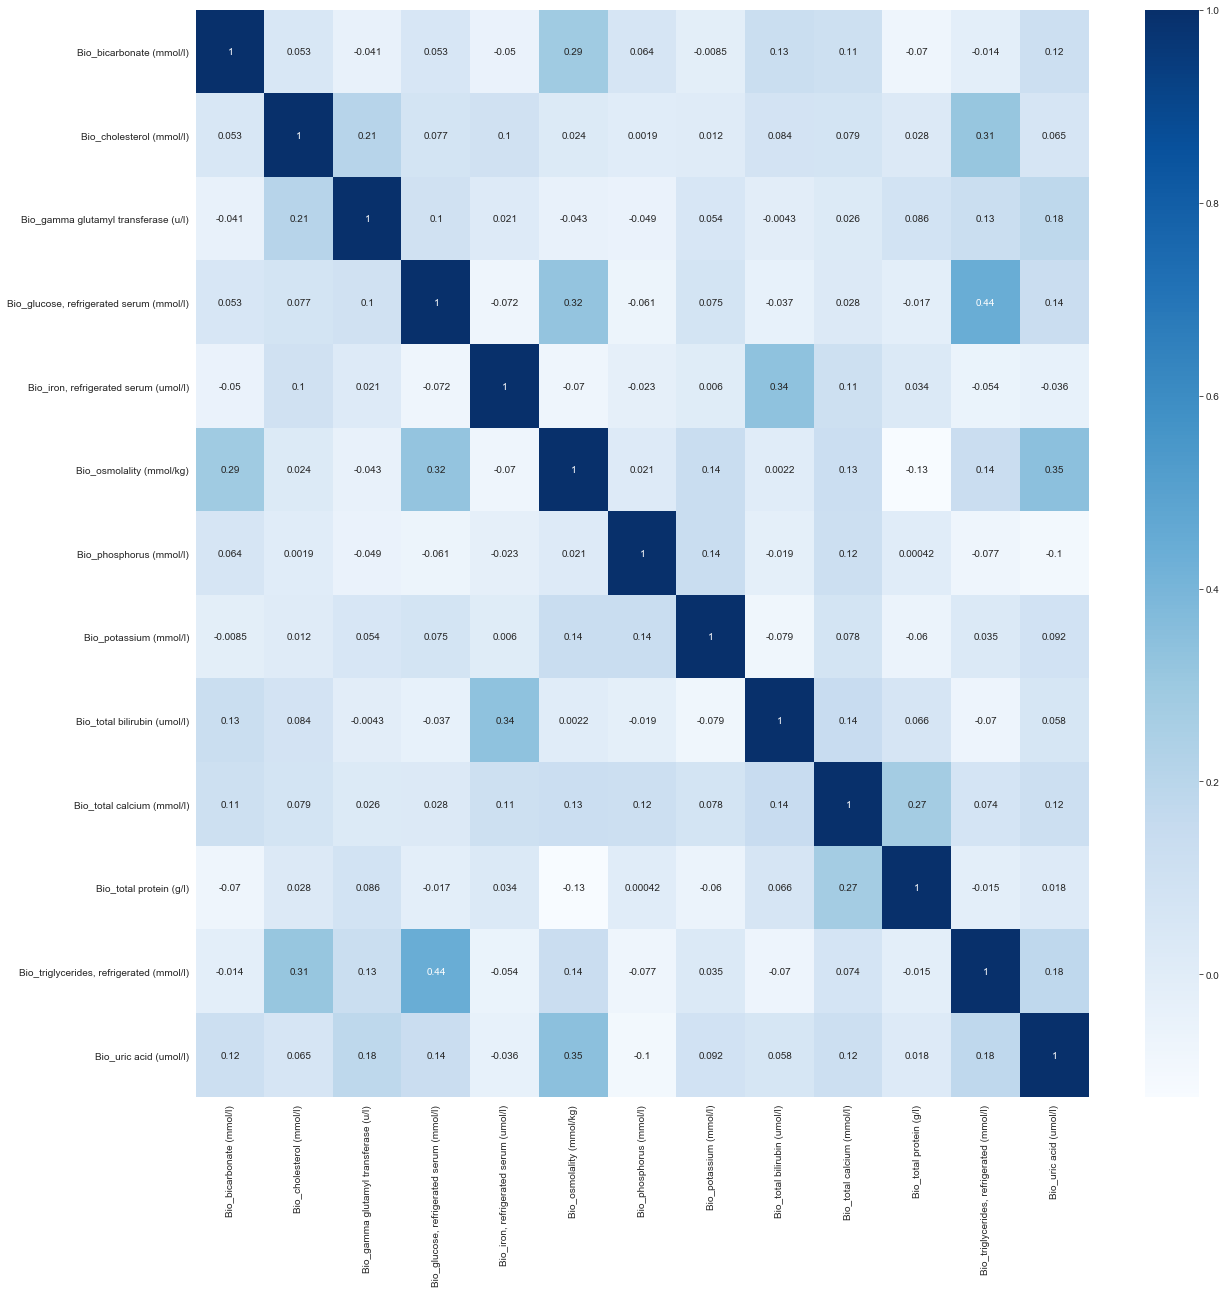

In [23]:
sns.set_style('darkgrid', {'legend.frameon':True})

#get correlations of each features in dataset
corrmat = train_X.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
ax=sns.heatmap(train[top_corr_features].corr(),annot=True,cmap="Blues")
#making sure the heatmap will not be cut
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)


Funtion to plot all the features vs breast cancer

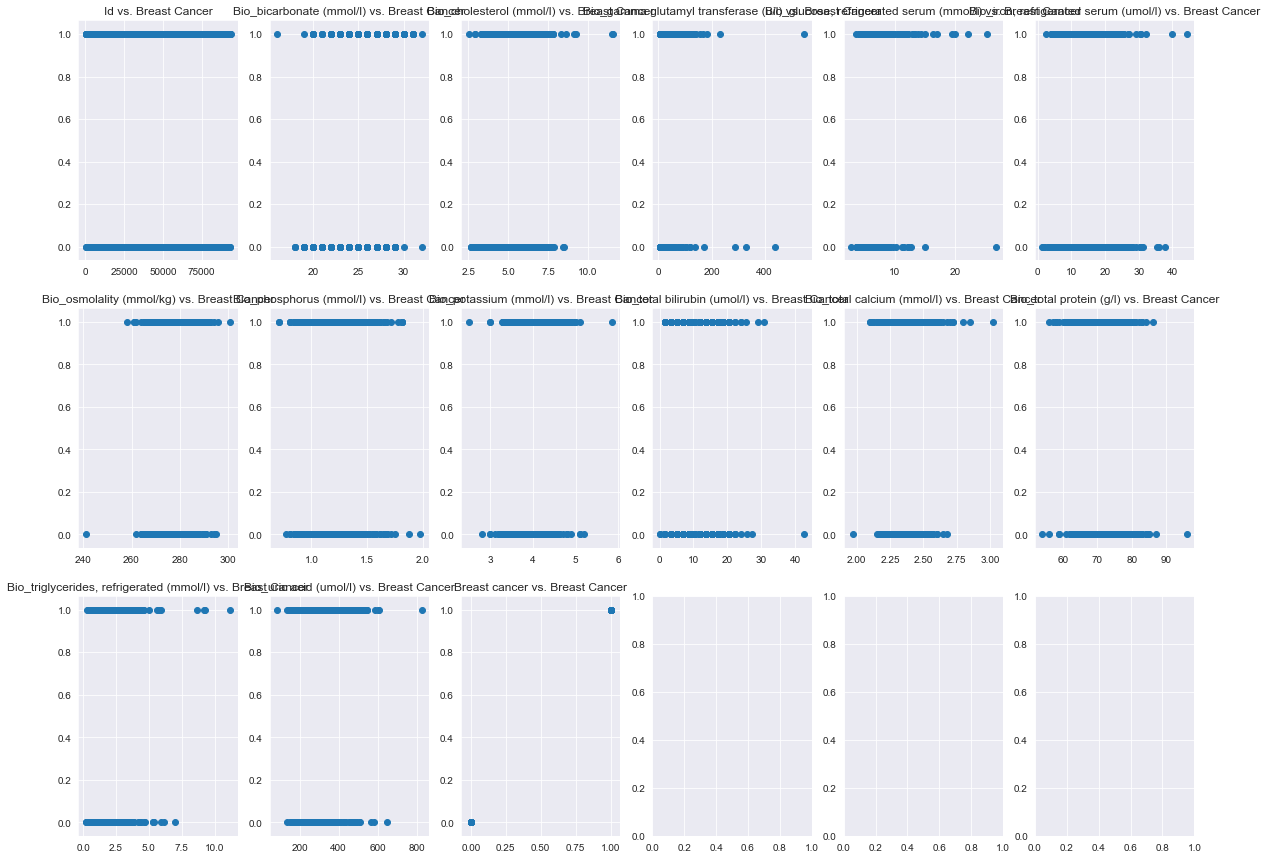

In [25]:
def plot_df_scatter_columns(df):
    fig, axes = plt.subplots(3,6, figsize = (20, 15))
    # initialize col and row
    col=0
    row=0
    # loop over df.iloc[:, :-1] instead of df
    for colname in df.iloc[:,]:
        axes[col, row].scatter(df[colname], df['Breast cancer'])
        axes[col, row].set_title(colname + ' vs. Breast Cancer')
        # calculate i and j on the fly during loop over df
        row += 1
        if row > 5:
            row=0
            col += 1
    plt.show()

plot_df_scatter_columns(train)

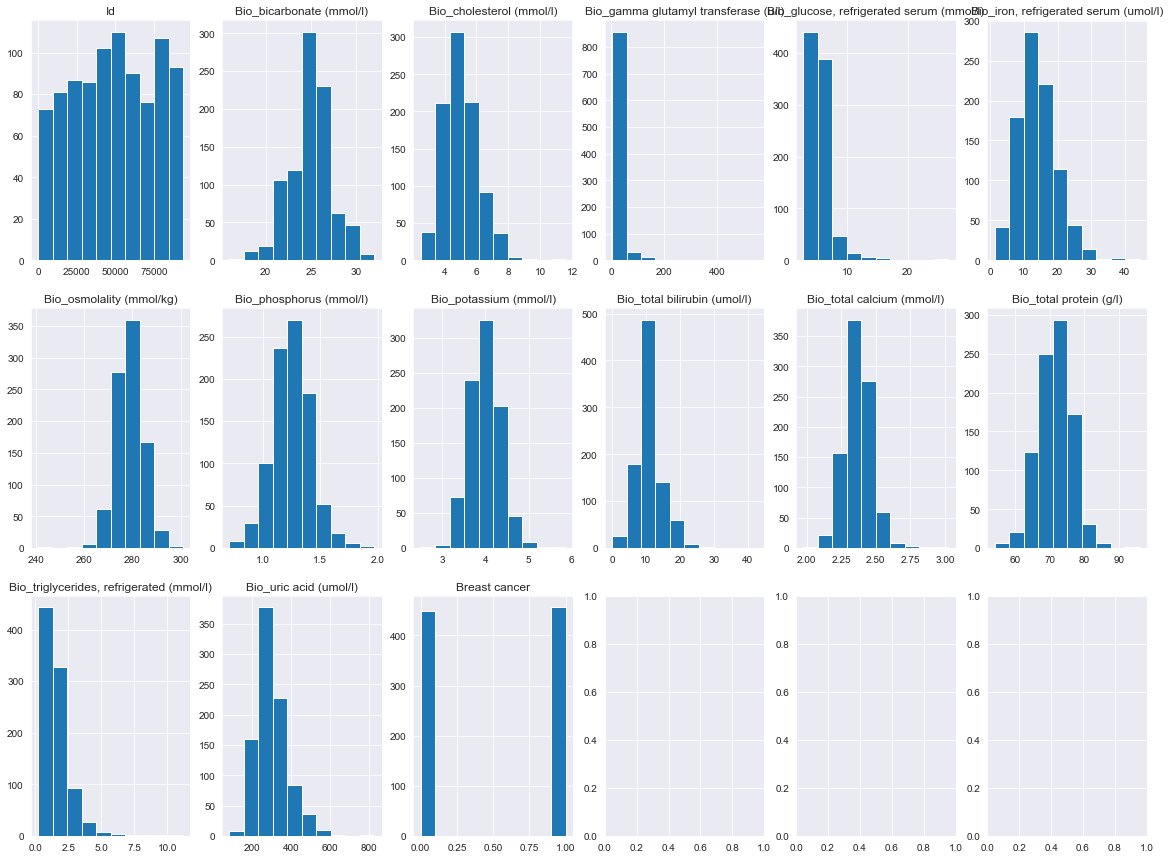

In [28]:
def plot_df_hist(df):
    fig, axes = plt.subplots(3,6, figsize = (20, 15))
    # initialize col and row
    col=0
    row=0
    # loop over df.iloc[:, :-1] instead of df
    for colname in df.iloc[:,]:
        axes[col, row].hist(df[colname])
        axes[col, row].set_title(colname)
        # calculate i and j on the fly during loop over df
        row += 1
        if row > 5:
            row=0
            col += 1
    plt.show()

plot_df_hist(train)

In [ ]:
scaled_train